# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

In [3]:
cities[:5]

['rikitea', 'mataura', 'mayumba', 'saldanha', 'kaitangata']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
weather_api_key

'c8b9cf8e041808818c631648e43e7413'

In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# print(json.dumps(requests.get(query_url + cities[0]).json(), indent=3))

data = requests.get(query_url + cities[0]).json()

In [6]:
data.keys()
# if curly brackets, use .keys to find the keys of interest

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [18]:
data['sys'][0]

KeyError: 0

In [19]:
print(json.dumps(data,indent=3))

{
   "coord": {
      "lon": -134.9692,
      "lat": -23.1203
   },
   "weather": [
      {
         "id": 804,
         "main": "Clouds",
         "description": "overcast clouds",
         "icon": "04d"
      }
   ],
   "base": "stations",
   "main": {
      "temp": 77.38,
      "feels_like": 77.07,
      "temp_min": 77.38,
      "temp_max": 77.38,
      "pressure": 1019,
      "humidity": 72,
      "sea_level": 1019,
      "grnd_level": 1016
   },
   "visibility": 10000,
   "wind": {
      "speed": 12.06,
      "deg": 116
   },
   "clouds": {
      "all": 96
   },
   "dt": 1612720888,
   "sys": {
      "country": "PF",
      "sunrise": 1612709028,
      "sunset": 1612755861
   },
   "timezone": -32400,
   "id": 4030556,
   "name": "Rikitea",
   "cod": 200
}


In [20]:
# DF to store all cities and city number (uses citipy)
city_df = pd.DataFrame({'City': cities})
print("Beginning Data Retrieval")
print("----------------------------")


# Sets parameters for calling city name


# Target Url for API calls
query_url = "http://api.openweathermap.org/data/2.5/weather"

# Create add'l fields for later api calls

city_df['Lat'] = ''
city_df['Lng'] = ''
city_df['Max Temp'] = ''
city_df['Humidity'] = ''
city_df['Cloudiness'] = ''
city_df['Wind Speed'] = ''
city_df['Country'] = ''
city_df['Date'] = ''

city_count = 0

# Loop through the API
for index,row in city_df.iterrows():

    city_name = row['City']
#     city_id = row['id']
    
    # Set query parameters
    params = {'q': city_name,'units': 'imperial','appid': weather_api_key,}
    response = requests.get(query_url, params = params).json()
    
    try:
       
        city_df.loc[index, 'Lat'] = response['coord']['lat']
        city_df.loc[index, 'Lng'] = response['coord']['lon']
        city_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_df.loc[index, 'Humidity'] = response['main']['humidity']
        city_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        city_df.loc[index, 'Country'] = response['sys']['country']
        city_df.loc[index, 'Date'] = response['dt']
        
        # Update city number
        city_count += 1
        
        # Print log of each city being processed (only if all data is available)
        print(f'Processing Record {city_count} | {city_name}')
        
    except (KeyError, IndexError):

        print("City not found. Skipping...")


## Every time the below three lines are included an error occurs.  So they are commented out until this is resolved.
# print("----------------------------")
# print("Data Retrieval Complete")
# print("----------------------------")

Beginning Data Retrieval
----------------------------
Processing Record 1 | rikitea
Processing Record 2 | mataura
Processing Record 3 | mayumba
Processing Record 4 | saldanha
Processing Record 5 | kaitangata
Processing Record 6 | albany
Processing Record 7 | busselton
City not found. Skipping...
Processing Record 8 | komsomolskiy
Processing Record 9 | la ronge
City not found. Skipping...
Processing Record 10 | chapada dos guimaraes
Processing Record 11 | lompoc
Processing Record 12 | mopti
Processing Record 13 | angoche
Processing Record 14 | atasu
Processing Record 15 | puerto ayora
Processing Record 16 | pagudpud
Processing Record 17 | ancud
Processing Record 18 | castro
Processing Record 19 | port hardy
Processing Record 20 | acapulco
Processing Record 21 | new norfolk
Processing Record 22 | alofi
Processing Record 23 | kaseda
Processing Record 24 | mindelo
Processing Record 25 | cape town
Processing Record 26 | atar
Processing Record 27 | avera
Processing Record 28 | cabo san lucas

Processing Record 234 | krutikha
Processing Record 235 | general pico
Processing Record 236 | kruisfontein
Processing Record 237 | itoman
Processing Record 238 | tual
Processing Record 239 | port lincoln
Processing Record 240 | hurghada
Processing Record 241 | isiro
Processing Record 242 | tabou
Processing Record 243 | chebsara
Processing Record 244 | spassk
Processing Record 245 | narsaq
Processing Record 246 | harsin
Processing Record 247 | filadelfia
Processing Record 248 | ipora
Processing Record 249 | soroti
City not found. Skipping...
Processing Record 250 | quatre cocos
Processing Record 251 | ciudad bolivar
Processing Record 252 | tonj
Processing Record 253 | puerto madryn
Processing Record 254 | iqaluit
Processing Record 255 | mhlume
Processing Record 256 | yei
City not found. Skipping...
Processing Record 257 | pueblo nuevo
Processing Record 258 | salalah
Processing Record 259 | kihei
Processing Record 260 | aptos
Processing Record 261 | dhidhdhoo
Processing Record 262 | stok

Processing Record 469 | chake chake
Processing Record 470 | santa lucia
Processing Record 471 | steenwijk
Processing Record 472 | kindu
Processing Record 473 | steamboat springs
Processing Record 474 | wangaratta
Processing Record 475 | pangnirtung
Processing Record 476 | baleshwar
Processing Record 477 | evansville
Processing Record 478 | havre-saint-pierre
Processing Record 479 | ginda
Processing Record 480 | vilhena
Processing Record 481 | luan
Processing Record 482 | kurilsk
Processing Record 483 | bambanglipuro
Processing Record 484 | egvekinot
Processing Record 485 | bealanana
Processing Record 486 | bonthe
Processing Record 487 | magadan
Processing Record 488 | bud
Processing Record 489 | balsas
Processing Record 490 | bundaberg
Processing Record 491 | iquique
Processing Record 492 | powell
Processing Record 493 | bati
Processing Record 494 | argelia
Processing Record 495 | mount gambier
Processing Record 496 | afyonkarahisar
City not found. Skipping...
Processing Record 497 | s

In [22]:
city_df.count()

City          637
Lat           637
Lng           637
Max Temp      637
Humidity      637
Cloudiness    637
Wind Speed    637
Country       637
Date          637
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
## dataframe was created in previous cell.
# export to csv and display
city_df.to_csv('raw_ city_df_export.csv', encoding = 'utf-8', index = False)
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.969,77.38,72,96,12.06,PF,1612720888
1,mataura,-46.1927,168.864,50.13,89,98,1.7,NZ,1612720898
2,mayumba,-3.432,10.6554,79.63,85,87,7.78,GA,1612721269
3,saldanha,-33.0117,17.9442,69.8,56,0,24.16,ZA,1612720968
4,kaitangata,-46.2817,169.846,59,94,70,3,NZ,1612721270


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [25]:
# Inspect data first and remove rows with null fields, etc.
city_df.replace('',np.nan,inplace = True)
city_df = city_df.dropna()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,77.38,72.0,96.0,12.06,PF,1.612721e+09
1,mataura,-46.1927,168.8643,50.13,89.0,98.0,1.70,NZ,1.612721e+09
2,mayumba,-3.4320,10.6554,79.63,85.0,87.0,7.78,GA,1.612721e+09
3,saldanha,-33.0117,17.9442,69.80,56.0,0.0,24.16,ZA,1.612721e+09
4,kaitangata,-46.2817,169.8464,59.00,94.0,70.0,3.00,NZ,1.612721e+09


In [26]:
city_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date          float64
dtype: object

In [28]:
# test if any cities have humidity over 100%
# this shows the highest humidity
city_df['Humidity'].max()

100.0

In [34]:
# ## note to future self.  Below are two additional ways of listing the cities with the hightest humidities

# # This shows the highest 20 humidities.  None above 100
# city_df.sort_values(by=['Humidity'],ascending=False).head(20)

# # another way of showing the top 15 cities cities with the highest humidity
# city_df.nlargest(15,['Humidity'])

From the above cell, there are no cities with humidity above 100. The max humidity is 100

In [ ]:
#  Get the indices of cities that have humidity over 100%.
#  This is not an applicable question as there are not ciites with humidity over 100%

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# The above instructions are not applicable as there are no cities with humidity over 100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This graph provides a visual analysis of max temps across latitudes
Due to the concentration of dots, there appears to be a correlation of max temp to latitude


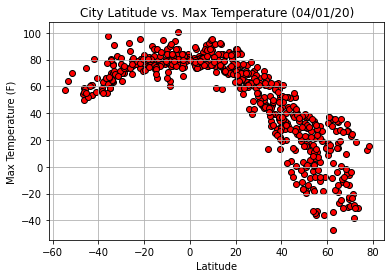

In [48]:
plt.scatter(city_df['Lat'],city_df['Max Temp'], c = 'r', edgecolor = 'k')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature (04/01/20)')
print("This graph provides a visual analysis of max temps across latitudes")
print("Due to the concentration of dots, there appears to be a correlation of max temp to latitude")

## Latitude vs. Humidity Plot

This graph provides a visual analysis of humidity across latitudes
The dots are relatively scattered across the graph but there is a higher concentration across the upper right (e.g. highter humidity associated with higherlatitude)


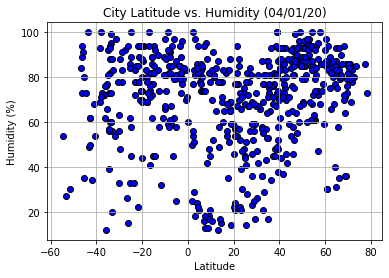

In [55]:
plt.scatter(city_df['Lat'],city_df['Humidity'], c = 'blue', edgecolor = 'k')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity (04/01/20)')
print("This graph provides a visual analysis of humidity across latitudes")
print("The dots are relatively scattered across the graph but there is a higher concentration across the upper right (e.g. highter humidity associated with higherlatitude)")

## Latitude vs. Cloudiness Plot

This graph provides a visual analysis of cloudiness across latitudes
There does not appear to be an obvious correlation between latitude and cloudiness


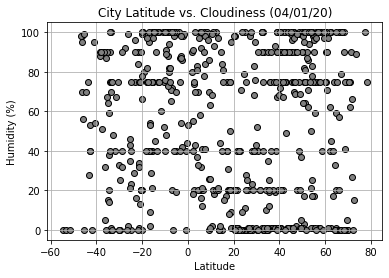

In [57]:
plt.scatter(city_df['Lat'],city_df['Cloudiness'], c = 'grey', edgecolor = 'k')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Cloudiness (04/01/20)')
print("This graph provides a visual analysis of cloudiness across latitudes")
print("There does not appear to be an obvious correlation between latitude and cloudiness")

## Latitude vs. Wind Speed Plot

This graph provides a visual analysis of windspeed across latitudes
There does not appear to be an obvious correlation between latitude and wind speed
However, there are a few outlier speeds above 30 mph and the majoriy are 20 mph or under


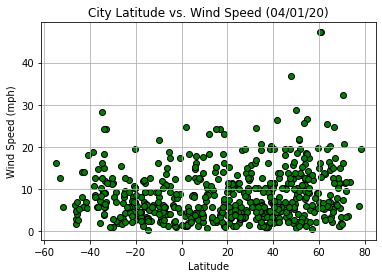

In [60]:
plt.scatter(city_df['Lat'],city_df['Wind Speed'], c = 'green', edgecolor = 'k')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed (04/01/20)')
print("This graph provides a visual analysis of windspeed across latitudes")
print("There does not appear to be an obvious correlation between latitude and wind speed")
print("However, there are a few outlier speeds above 30 mph and the majoriy are 20 mph or under")

## Linear Regression

In [ ]:
north_city_df = city_df.loc[citydf['Latitude']>0]
plt.scatter(north_citydf['Latitude'],north_citydf['Max Temp (F)'], c = 'r', edgecolor = 'k')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Northern Hemisphere: Latitude vs. Max Temperature')

# Regression Analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_citydf['Latitude'],north_citydf['Max Temp (F)'])
regress_values = north_citydf['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_citydf['Latitude'],regress_values)
plt.annotate(line_eq,(10,50),fontsize=12,color="b")
print(f"The r-squared is: {round(rvalue**2,2)}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# don't rum this - sample

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# don't rum this - sample

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# don't rum this - sample

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# don't rum this - sample

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# don't rum this - sample

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# don't rum this - sample

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# don't rum this - sample

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# don't rum this - sample